### Import Lib

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal
from keras.preprocessing.image import load_img


**4.1 VGG16 MODEL PARAMETERS**

In [50]:
#Read image
img = cv2.imread('pic.jpg')
img = cv2.resize(img,(224,224))


model.summary()
kernels,biases = model.layers[1].get_weights()
model.layers[1].get_config()

img = img_to_array(img)
img = expand_dims(img,axis=0)
img_ready = preprocess_input(img)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


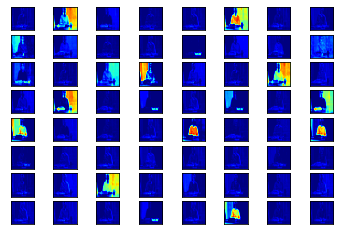

In [39]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

feature_maps = model.predict(img_ready)

square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='jet')
		ix += 1
plt.show()

**4.2 IMAGE PREPARATION (From Scratch)**

(1, 224, 224, 3)


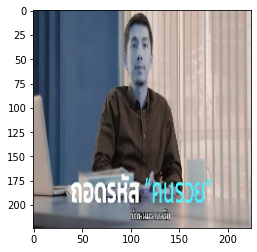

In [66]:
#Read Image
img = cv2.imread('pic.jpg')

img_res = cv2.resize(img,(224,224))

# img_mean = [123.68,116.779,103.939] R G B
img_mean = [103.939,116.779,123.68] # B G R

img_reshape = np.array([img_res])
print(img_reshape.shape)

# img.resize(224,224)
plt.imshow(img_res)
plt.show()

# bb_01 = img_res
# b_01 = bb_01[:, :, 0]
# b_01 -= img_mean[0]

# gg_01 = img_res
# g_01 = gg_01[:, :, 1]
# g_01 -= img_mean[1]

# rr_01 = img_res
# r_01 = rr_01[:, :, 2]
# r_01 -= img_mean[2] 
# img = tf.subtract(img, mean_img)



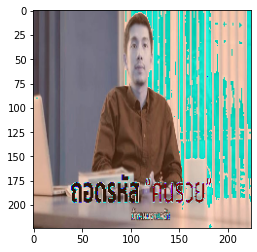

In [68]:
for i in range(len(img_mean)):
    img_reshape[0, :, :, i] = img_reshape[0, :, :, i].astype('float') - np.array([[img_mean[i]]*224]*224)

plt.imshow(img_reshape[0],cmap='jet')
plt.show()

**4.3 CONV2D()**

In [69]:
# Operate 2D convolution to image from 4.2(ImgBGR)
    # Image convolution with kernel
# img_result[:,:,0] = signal.convolve2d(img_reshape[:,:,0], kernels[:,:,0,0],mode='same',boundary='fill',fillvalue=0)
# img_result[:,:,1] = signal.convolve2d(img_reshape[:,:,0], kernels[:,:,0,0],mode='same',boundary='fill',fillvalue=0)
# img_result[:,:,2] = signal.convolve2d(img_reshape[:,:,0], kernels[:,:,0,0],mode='same',boundary='fill',fillvalue=0)

ValueError: convolve2d inputs must both be 2-D arrays

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal
